# Задача 2

In [ ]:
%pip install torchmetrics -q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 10.7 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split
import torch.nn.functional as F
import torchmetrics
from torchmetrics import R2Score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import *



In [ ]:
dataset = pd.read_csv("/content/gold.csv")
print(dataset.shape)
dataset.head()

(2558, 121)


,3M Libor_T-1,EM Bond_T-1,US Bond ETF_T-1,Wheat 1_T-1,Wheat 2_T-1,Crude Palm Oil_T-1,Brent 1_T-1,Brent 2_T-1,Light Crude_T-1,White Sugar_T-1,...,MSCI EM_T-22,Shanghai Index_T-22,Nikkei Ind_T-22,MSCI APAC ex J_T-22,EMEquity ETF_T-22,Silver_T-22,Platinum_T-22,Palladium_T-22,Gold_T-22,Gold_T+22
0,0.000000,0.000879,0.001050,0.013158,0.013562,0.003163,-0.007879,-0.004945,-0.003486,-0.024706,...,-0.009862,0.073090,-0.028816,-0.001613,-0.012274,-0.025210,0.024300,0.082695,0.053534,0.004648
1,-0.004587,0.004096,0.002383,0.043599,0.041035,0.040991,0.042356,0.039759,0.029667,0.047906,...,0.006801,0.099088,-0.043704,0.007670,0.018151,0.060624,0.068595,0.151468,0.085822,-0.002105
2,-0.003465,-0.002040,0.000856,0.020444,0.017995,0.003462,0.006222,0.006541,0.007172,0.005262,...,0.014873,0.102887,-0.051438,0.007525,0.028712,0.056289,0.083520,0.134763,0.083915,-0.037438
3,-0.004624,0.000584,-0.002090,-0.015679,-0.012626,0.021992,0.003029,0.004249,0.002498,0.020775,...,0.004931,0.087208,-0.054678,0.005445,0.001445,0.041620,0.061601,0.109940,0.076738,-0.028097
4,-0.009292,-0.000486,0.001047,-0.003540,-0.002558,-0.012658,-0.024912,-0.022026,-0.023551,-0.025000,...,-0.003838,0.076564,-0.076171,-0.009558,-0.003904,0.058352,0.069414,0.094311,0.084487,-0.045466


In [ ]:
dataset.describe()

,3M Libor_T-1,EM Bond_T-1,US Bond ETF_T-1,Wheat 1_T-1,Wheat 2_T-1,Crude Palm Oil_T-1,Brent 1_T-1,Brent 2_T-1,Light Crude_T-1,White Sugar_T-1,...,MSCI EM_T-22,Shanghai Index_T-22,Nikkei Ind_T-22,MSCI APAC ex J_T-22,EMEquity ETF_T-22,Silver_T-22,Platinum_T-22,Palladium_T-22,Gold_T-22,Gold_T+22
count,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,...,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000
mean,0.000832,0.000054,0.000035,0.000105,0.000083,0.000081,0.000063,0.000048,0.000039,-0.000126,...,0.001521,0.001640,0.007724,0.002843,0.001348,0.003429,-0.002040,0.016255,0.004002,0.003222
std,0.007570,0.004277,0.002073,0.018729,0.017929,0.014268,0.018331,0.017958,0.019077,0.016468,...,0.050782,0.067590,0.055285,0.047920,0.053453,0.082057,0.058466,0.081979,0.044998,0.044198
min,-0.075051,-0.044433,-0.012440,-0.086872,-0.090000,-0.112903,-0.084337,-0.083457,-0.100408,-0.117669,...,-0.186586,-0.316587,-0.188626,-0.185257,-0.194926,-0.303009,-0.212727,-0.267772,-0.149107,-0.149107
25%,-0.002105,-0.001950,-0.001127,-0.011117,-0.010545,-0.006871,-0.009334,-0.009379,-0.010202,-0.008780,...,-0.028663,-0.037221,-0.025363,-0.024215,-0.031686,-0.049056,-0.041553,-0.037162,-0.023329,-0.023619
50%,0.000000,0.000092,0.000091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003532,0.002802,0.011238,0.006085,0.002076,-0.005047,-0.004983,0.018242,0.001952,0.001441
75%,0.003278,0.002254,0.001346,0.010361,0.009619,0.006567,0.009706,0.009532,0.010429,0.008175,...,0.035178,0.036260,0.044586,0.033261,0.037184,0.052980,0.039107,0.069460,0.032227,0.031532
max,0.145989,0.033682,0.008395,0.093916,0.118492,0.153199,0.089039,0.090140,0.099622,0.104769,...,0.182996,0.275124,0.193466,0.189002,0.194412,0.305908,0.223757,0.288488,0.194723,0.194723


In [ ]:
dataset.isnull().sum()

3M Libor_T-1       0
EM Bond_T-1        0
US Bond ETF_T-1    0
Wheat 1_T-1        0
Wheat 2_T-1        0
                  ..
Silver_T-22        0
Platinum_T-22      0
Palladium_T-22     0
Gold_T-22          0
Gold_T+22          0
Length: 121, dtype: int64

In [ ]:
dataset.isnull().sum().sum()  # Видим, что пустые значения вообще отсутствуют 

0

In [ ]:
dataset.info(memory_usage='deep') # Датасет не занимает много памяти, поэтому не будем клссифицировать колонки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Columns: 121 entries, 3M Libor_T-1 to Gold_T+22
dtypes: float64(121)
memory usage: 2.4 MB


In [ ]:
dataset.nunique() # Тут мы можем убедиться, что кол-во уникальных значений велико, поэтому не будем ничего менять

3M Libor_T-1       2020
EM Bond_T-1        2429
US Bond ETF_T-1    2344
Wheat 1_T-1        2378
Wheat 2_T-1        2389
                   ... 
Silver_T-22        2545
Platinum_T-22      2554
Palladium_T-22     2553
Gold_T-22          2557
Gold_T+22          2557
Length: 121, dtype: int64

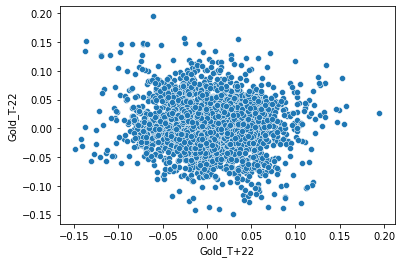

In [ ]:
sns.scatterplot(x=dataset['Gold_T+22'],y=dataset['Gold_T-22']) # Заметно, что иногда наблюдается пересечение

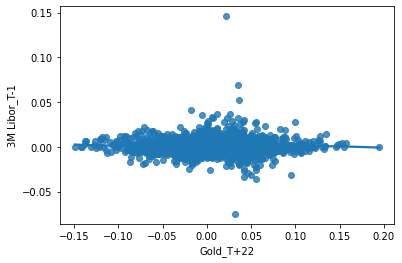

In [ ]:
sns.regplot(x=dataset['Gold_T+22'],y=dataset['3M Libor_T-1'], data=dataset, order=3, ci=None)


In [ ]:
sns.regplot(x=dataset['Gold_T+22'],y=dataset['3M Libor_T-1'], data=dataset, order=3, ci=None)


## Регрессия Pytorch

In [ ]:
dataset.columns

Index(['3M Libor_T-1', 'EM Bond_T-1', 'US Bond ETF_T-1', 'Wheat 1_T-1',
       'Wheat 2_T-1', 'Crude Palm Oil_T-1', 'Brent 1_T-1', 'Brent 2_T-1',
       'Light Crude_T-1', 'White Sugar_T-1',
       ...
       'MSCI EM_T-22', 'Shanghai Index_T-22', 'Nikkei Ind_T-22',
       'MSCI APAC ex J_T-22', 'EMEquity ETF_T-22', 'Silver_T-22',
       'Platinum_T-22', 'Palladium_T-22', 'Gold_T-22', 'Gold_T+22'],
      dtype='object', length=121)

In [ ]:
looking_for = 'Gold_T+22'

In [ ]:
X = dataset.drop(labels=[looking_for], axis=1)
y = dataset[looking_for]


In [ ]:
sscaler = preprocessing.StandardScaler()
sscaler.fit(X)
X_std= sscaler.transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3,random_state=42)
X_train.shape

(1790, 120)

!!! ОБРАЩАЙТЕ ВНИМАНИЕ НА КОММЕНТЫ В ЭТИХ МЕСТАХ

***Здесь вы можете менять значенияя***

In [ ]:
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.layer1=nn.Linear(X_train.shape[1],120) 
    self.layer2=nn.Linear(120,100) 
    self.layer3=nn.Linear(100,80) 
    self.layer4=nn.Linear(80,60) 
    self.layer5=nn.Linear(60,40) 
    self.layer6=nn.Linear(40,20) 
    self.layer7=nn.Linear(20,1) 

    
  def forward(self,x):
    x=F.relu(self.layer1(x))
    x=F.relu(self.layer2(x))
    x=F.relu(self.layer3(x))
    x=F.relu(self.layer4(x))
    x=F.relu(self.layer5(x))
    x=F.relu(self.layer6(x))
    x=self.layer7(x)
    return x
model = NN()
print(model)

NN(
  (layer1): Linear(in_features=120, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=80, bias=True)
  (layer4): Linear(in_features=80, out_features=60, bias=True)
  (layer5): Linear(in_features=60, out_features=40, bias=True)
  (layer6): Linear(in_features=40, out_features=20, bias=True)
  (layer7): Linear(in_features=20, out_features=1, bias=True)
)


In [ ]:
x=torch.tensor(np.array(X_train),dtype=torch.float32,requires_grad=True)
y=torch.tensor(np.array(y_train).reshape(-1,1),dtype=torch.float32)
x

tensor([[-0.1099,  0.6442, -0.2907,  ...,  0.9891,  0.7808, -0.8218],
        [-0.1099,  0.9588, -1.1553,  ..., -0.9114, -1.5906,  0.5829],
        [ 0.2380,  0.2009, -1.2445,  ..., -1.3350,  0.7382, -0.9608],
        ...,
        [ 0.7394,  0.4811, -0.2400,  ...,  0.7646,  0.5091,  1.4800],
        [-0.2519,  0.4990,  0.7735,  ..., -0.6980, -0.1095, -0.2747],
        [-1.4906, -1.8179, -0.7566,  ..., -1.1092, -0.6440, -1.4390]],
       requires_grad=True)

***Здесь тоже можете менять значения***

In [ ]:
loss_fn=nn.MSELoss()
optimizer= torch.optim.SGD(model.parameters(),lr=0.0001) 

In [ ]:
epochs=1500 # Можно увеличить данное значение и получить лучше результат
losses=[]
iters=[]
for i in range(epochs):
  running_loss = 0.0
  #initialize the model parameter
  optimizer.zero_grad(set_to_none=True)
  #calculate the loss
  output=model(x)
  loss=loss_fn(output,y)
  losses.append(running_loss+loss.item())
  iters.append(i)
  #backpropagation
  loss.backward()
  #update the parameters
  optimizer.step()
  if(i%10==0):
        iters.append(i)
        losses.append(loss)
        
  if(i%50==0):
    print(f"epochs: {i}......loss:{loss}")

epochs: 0......loss:0.03796715289354324
epochs: 50......loss:0.03699091821908951
epochs: 100......loss:0.03604167699813843
epochs: 150......loss:0.035118624567985535
epochs: 200......loss:0.03422095626592636
epochs: 250......loss:0.03334798663854599
epochs: 300......loss:0.03249899297952652
epochs: 350......loss:0.03167329356074333
epochs: 400......loss:0.030870191752910614
epochs: 450......loss:0.03008902445435524
epochs: 500......loss:0.02932910993695259
epochs: 550......loss:0.028589854016900063
epochs: 600......loss:0.02787075750529766
epochs: 650......loss:0.02717122621834278
epochs: 700......loss:0.02649069018661976
epochs: 750......loss:0.025828611105680466
epochs: 800......loss:0.0251845084130764
epochs: 850......loss:0.02455790713429451
epochs: 900......loss:0.02394830249249935
epochs: 950......loss:0.023355204612016678
epochs: 1000......loss:0.02277814783155918
epochs: 1050......loss:0.022216707468032837
epochs: 1100......loss:0.021670451387763023
epochs: 1150......loss:0.021

In [ ]:
y_train_pred = model(torch.tensor(X_train,dtype=torch.float32,requires_grad=True))
y_test_pred = model(torch.tensor(X_test,dtype=torch.float32))

#convert to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

In [ ]:
from sklearn.metrics import r2_score

test_accuracy=r2_score(y_test,y_test_pred)
train_accuracy=r2_score(y_train,y_train_pred)
print(train_accuracy)
print(test_accuracy)

-8.274532475597585
-7.751732802349597


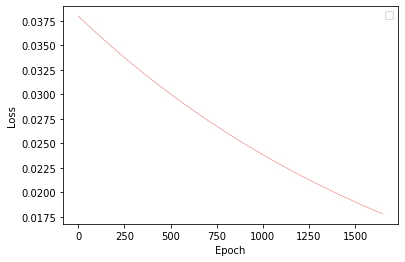

In [ ]:
plt.plot(np.arange(len(iters)),list(map(float, losses)), 'r', linewidth=0.3)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

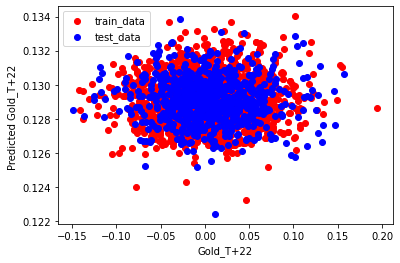

In [ ]:
plt.xlabel(looking_for)
plt.ylabel(f"Predicted {looking_for} ")
plt.scatter(y_train,y_train_pred,color='r',label="train_data")
plt.scatter(y_test,y_test_pred,color='b',label="test_data")
plt.legend()
plt.show()

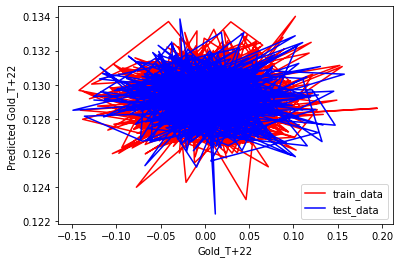

In [ ]:
plt.xlabel(looking_for)
plt.ylabel(f"Predicted {looking_for} ")
plt.plot(y_train,y_train_pred,color='r',label="train_data")
plt.plot(y_test,y_test_pred,color='b',label="test_data")
plt.legend()
plt.show()

3 задача

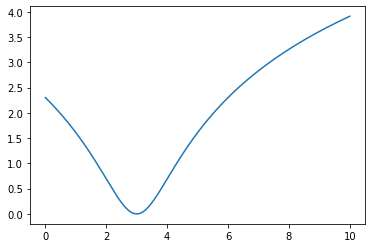

In [ ]:
def f(x: torch.Tensor) -> torch.Tensor:
    return torch.log(x ** 2 - 6 * x + 10)


SIGN = -1

START, END = 0, 10
EPS = 0.0000001
LR = 0.00005

X = torch.arange(START, END + 0.001, 0.001)
Y = f(X)
plt.plot(X.detach(), Y.detach());

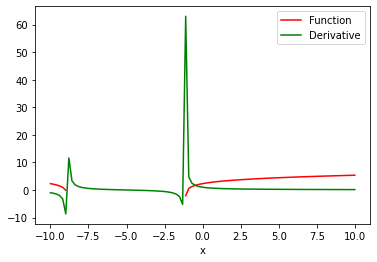

In [ ]:
import math
x = torch.linspace(-10, 10, 100, requires_grad = True)
Y = torch.log(x**2 + 10*x + 10)
y = torch.sum(Y)
y.backward()
 
# ploting the function and derivative
function_line, = plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'Function')
function_line.set_color("red")
derivative_line, = plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'Derivative')
derivative_line.set_color("green")
plt.xlabel('x')
plt.legend()
plt.show()